In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import zscore
from sklearn.neural_network import MLPRegressor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder

In [3]:
GData= pd.read_csv('/content/game_data_by_team_apr14_3.csv',encoding= 'latin1',low_memory=False)

GData.head()

,Date,Team,Home_Away,Opponent,Team_Score,Opponent_Score,winner,Wins_Last_8,Wins_Last_16,Wins_Last_32,Team_ML,sentiment_past_week,Offensive_Rating_Last_8,Defensive_Rating_Last_8
0,2022-02-13,Cincinnati Bengals,Home,Los Angeles Rams,20,23,Loss,6,10,16,2.800000,2.258842,25.125,21.000
1,2022-02-13,Los Angeles Rams,Away,Cincinnati Bengals,23,20,Win,7,12,22,1.450000,-0.456782,26.000,19.625
2,2022-01-30,Kansas City Chiefs,Home,Cincinnati Bengals,24,27,Loss,7,13,25,1.306290,-0.865052,35.375,21.375
3,2022-01-30,Cincinnati Bengals,Away,Kansas City Chiefs,27,24,Win,5,10,16,3.700000,1.685615,24.500,23.125
4,2022-01-30,Los Angeles Rams,Home,San Francisco 49ers,20,17,Win,7,11,21,1.562778,0.939055,28.125,18.375


In [4]:


GData = GData.drop(GData.loc[GData['Team_ML'] > 5.00].index)
GData = GData.drop(GData.loc[GData['sentiment_past_week'] == 0].index)


In [5]:
# Convert Wins_Last_X columns into win percentages
GData['Win_Percentage_Last_8'] = GData['Wins_Last_8'] / 8
GData['Win_Percentage_Last_16'] = GData['Wins_Last_16'] / 16
GData['Win_Percentage_Last_32'] = GData['Wins_Last_32'] / 32




#Decision Tree

In [6]:



X = GData[['Wins_Last_8','Offensive_Rating_Last_8','Home_Away', 'Defensive_Rating_Last_8']]
y = GData['Team_ML']

X.loc[X['Home_Away'] == 'Home', 'Home_Away'] = 1
X.loc[X['Home_Away'] == 'Away', 'Home_Away'] = 0


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

tree_regressor = DecisionTreeRegressor(random_state=42)

tree_regressor.fit(X_train, y_train)

y_pred = tree_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Squared Error: 1.3769720531253204
R-squared: -0.49359145609459065


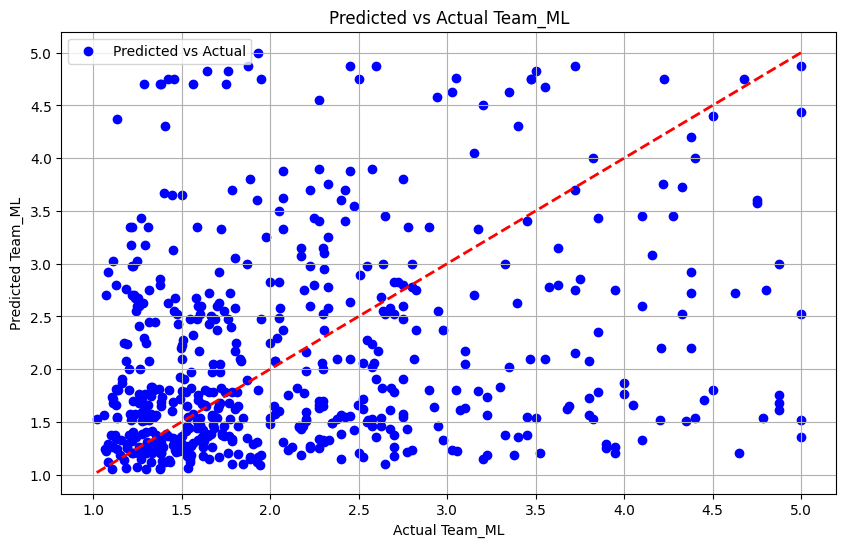

In [7]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Team_ML')
plt.ylabel('Predicted Team_ML')
plt.title('Predicted vs Actual Team_ML')
plt.legend()
plt.grid(True)
plt.show()

#Random Forest

In [8]:
from sklearn.ensemble import RandomForestRegressor


X = GData[['Wins_Last_8','Offensive_Rating_Last_8','Home_Away', 'Defensive_Rating_Last_8']]
y = GData['Team_ML']



# Convert 'Home_Away' to numeric
X.loc[X['Home_Away'] == 'Home', 'Home_Away'] = 1
X.loc[X['Home_Away'] == 'Away', 'Home_Away'] = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

rf_regressor = RandomForestRegressor(random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r_squared = r2_score(y_test, y_pred)

print("R-squared:", r_squared)

Mean Squared Error: 0.7960429670230462
R-squared: 0.10039310162591786


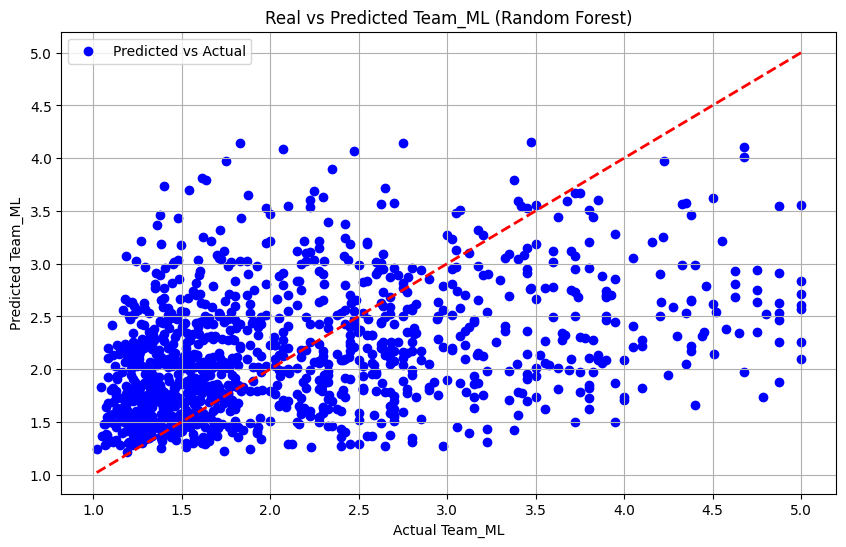

In [9]:
# Plot real vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Team_ML')
plt.ylabel('Predicted Team_ML')
plt.title('Real vs Predicted Team_ML (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

#KNN

In [10]:
from sklearn.neighbors import KNeighborsRegressor


X = GData[['Wins_Last_8','Offensive_Rating_Last_8','Home_Away', 'Defensive_Rating_Last_8']]
y = GData['Team_ML']

X.loc[X['Home_Away'] == 'Home', 'Home_Away'] = 1
X.loc[X['Home_Away'] == 'Away', 'Home_Away'] = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_regressor = KNeighborsRegressor()

knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



r_squared = r2_score(y_test, y_pred)

print("R-squared:", r_squared)

Mean Squared Error: 0.7422994190703605
R-squared: 0.19483328098702912


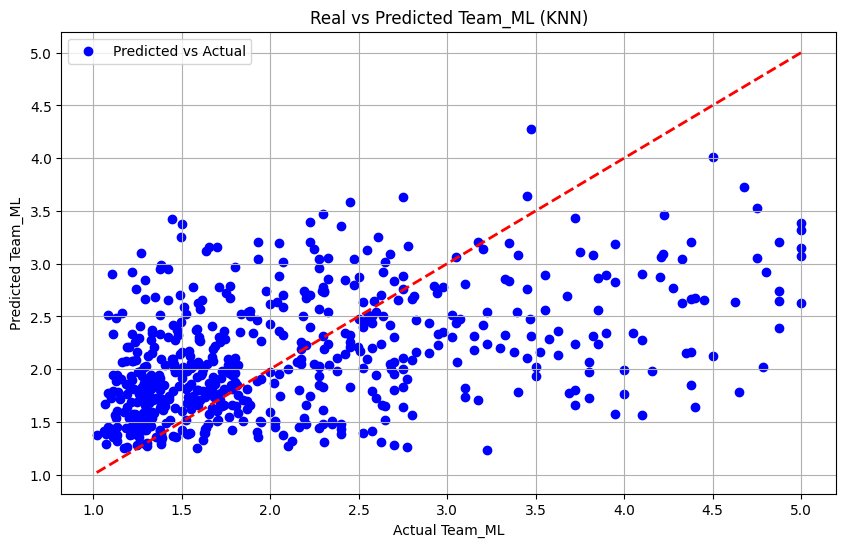

In [11]:
# Plot real vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Team_ML')
plt.ylabel('Predicted Team_ML')
plt.title('Real vs Predicted Team_ML (KNN)')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Convert all variables to float64
GData['Wins_Last_8'] = GData['Wins_Last_8'].astype('float64')
# GData['Wins_Last_16'] = GData['Wins_Last_16'].astype('float64')

GData['Offensive_Rating_Last_8'] = GData['Offensive_Rating_Last_8'].astype('float64')
GData['Defensive_Rating_Last_8'] = GData['Defensive_Rating_Last_8'].astype('float64')


# GData['sentiment_past_week'] = GData['sentiment_past_week'].astype('float64')

GData['Home_Away'] = GData['Home_Away'].replace({'Home': 1, 'Away': 0}).astype(float)







X = GData[['Wins_Last_8',  'Home_Away',  'Offensive_Rating_Last_8', 'Defensive_Rating_Last_8']]
y = GData['Team_ML']









X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



#Neural Network

In [13]:
# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),  # 4 input features
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Predict on the test set
y_pred = model.predict(X_test_scaled).ravel()

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

18/18 [==============================] - 0s 1ms/step
Mean Squared Error: 0.6876635834593743
R-squared: 0.2540963699363955


#Neural Network 2

In [14]:
from keras.layers import Dropout
from keras import regularizers

# Build the neural network model with dropout regularization
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dropout(0.2),  # Add dropout layer with a dropout rate of 0.2 (adjust as needed)
    Dense(64, activation='relu'),
    Dropout(0.2),  # Add dropout layer with a dropout rate of 0.2 (adjust as needed)
    Dense(1)
])

# Compile the model with mean squared error loss and L2 regularization
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Predict on the test set
y_pred = model.predict(X_test).ravel()

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)


# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

18/18 [==============================] - 0s 1ms/step
Mean Squared Error: 0.6582634983105328
Root Mean Squared Error: 0.8113343936445273
R-squared: 0.28598642601058855


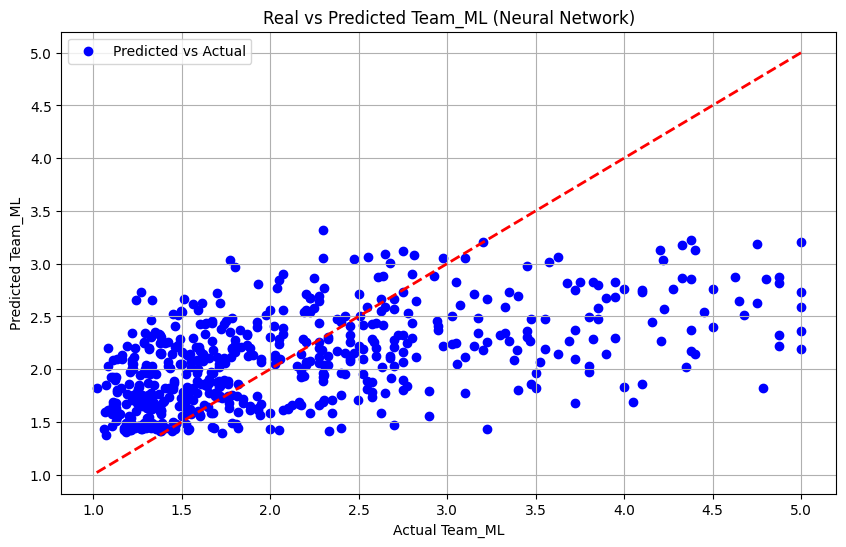

In [15]:
# Plot real vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Team_ML')
plt.ylabel('Predicted Team_ML')
plt.title('Real vs Predicted Team_ML (Neural Network)')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

class KerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        self.model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
        return self

    def predict(self, X):
        return np.ravel(self.model.predict(X))

# Wrap the neural network model
keras_regressor = KerasRegressor(model)


In [18]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor




#Gradient Boost (from)

In [19]:
X = GData[['Wins_Last_8','Offensive_Rating_Last_8','Home_Away', 'Defensive_Rating_Last_8']]
y= GData['Team_ML']



X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.6,random_state=42)

G= GradientBoostingRegressor(random_state=0)

G.fit(X_train, y_train)

Pred= G.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, Pred)
print("R-squared:", r_squared)

R-squared: 0.22076975444428293


#Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_regression = LinearRegression()


linear_regression.fit(X_train, y_train)

y_pred = linear_regression.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Squared Error: 0.668976901425935
R-squared: 0.2851989654896292


#Ensemble


In [28]:
ensemble_model = VotingRegressor([('decision_tree', tree_regressor),
                                  ('knn', knn_regressor),
                                  ('random_forest', rf_regressor),
                                  ('neural_network', keras_regressor),
                                  ('Gradient Boost', G),
                                  ('Linear Regression', linear_regression)

                                  ])

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

12/12 [==============================] - 0s 2ms/step
Mean Squared Error: 0.7311167926220792
R-squared: 0.21880256463230696


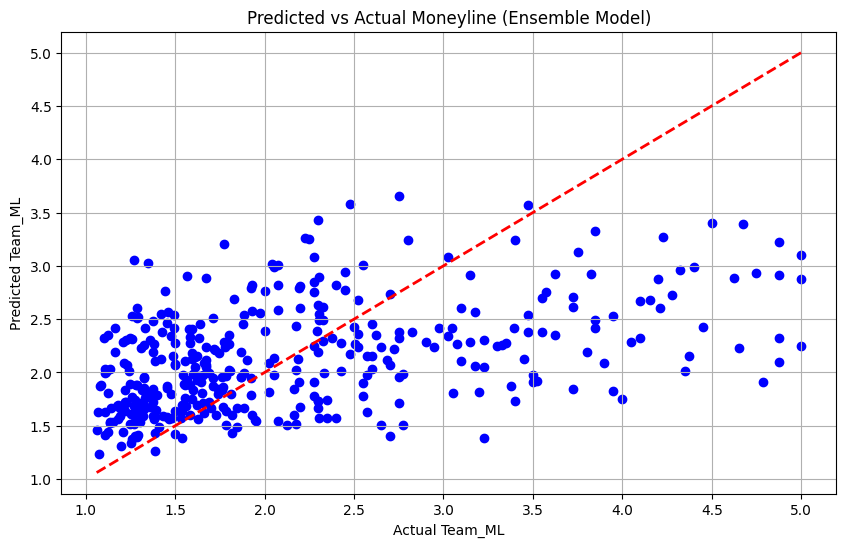

In [29]:
#plot predicted vs actual from the ensemble model

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Team_ML')
plt.ylabel('Predicted Team_ML')
plt.title('Predicted vs Actual Moneyline (Ensemble Model)')
plt.grid(True)
plt.show()
